In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('minute_weather.csv')

In [3]:
data.shape # 1.6M rows

(1587257, 13)

In [4]:
data.head(3)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0


In [6]:
sampled_df = data[data['rowID'] % 10 == 0]

In [7]:
sampled_df.shape

(158726, 13)

In [8]:
sampled_df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [9]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [10]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [11]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [13]:
rows_before - rows_after

46

In [14]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [25]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [16]:
select_df = sampled_df[features]

In [17]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [21]:
kmeans = KMeans(n_clusters = 12)
model = kmeans.fit(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
centers = model.cluster_centers_

In [34]:
type(centers)

numpy.ndarray

In [30]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction') # last col called prediction
    
    Z = [np.append(A, index) for index, A in enumerate(centers)] 
    #index controls the class label, A interate over the array
    
    P = pd.DataFrame(Z, columns = colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P
P = pd_centers(features, centers)
P   

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.693275,0.548051,0.178788,-0.583632,0.348137,-0.597038,-0.117050,0
1,0.058776,-0.787285,-1.196233,-0.571047,-1.042111,-0.585578,0.877313,1
2,-1.181223,-0.874343,0.446985,1.979777,0.538825,1.941078,0.912279,2
3,1.190741,-0.255274,-1.154977,2.124704,-1.053494,2.241581,-1.134570,3
4,-0.839647,-1.199058,0.375246,0.360722,0.473554,0.348705,1.361942,4
5,0.248209,-0.994698,0.658989,-0.547276,0.850157,-0.529956,1.159924,5
6,-0.211717,0.631362,0.408481,0.735901,0.516575,0.673728,-0.149937,6
7,-0.162887,0.863435,-1.311018,-0.589815,-1.166717,-0.605135,-0.641750,7
8,0.132100,0.843907,1.410490,-0.638523,1.674564,-0.589277,-0.714017,8
9,0.234062,0.319341,1.887932,-0.651899,-1.551734,-0.576745,-0.282742,9


In [ ]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data))) # repeat list
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

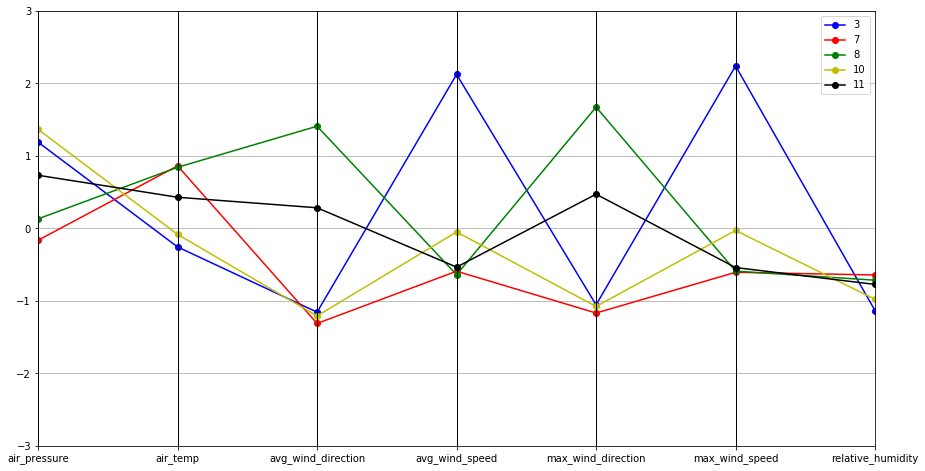

In [38]:
# The parallel plot showing the center of dry classes    
parallel_plot(P[P['relative_humidity'] < -0.5])

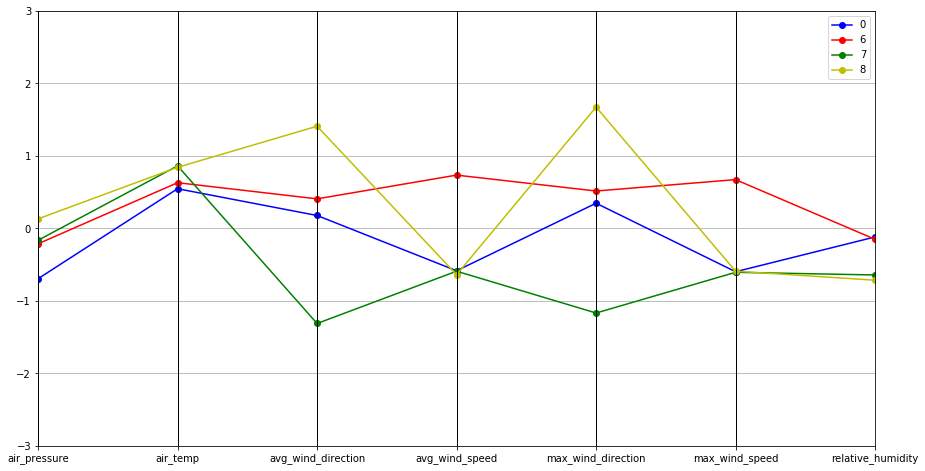

In [39]:
parallel_plot(P[P['air_temp'] > 0.5])

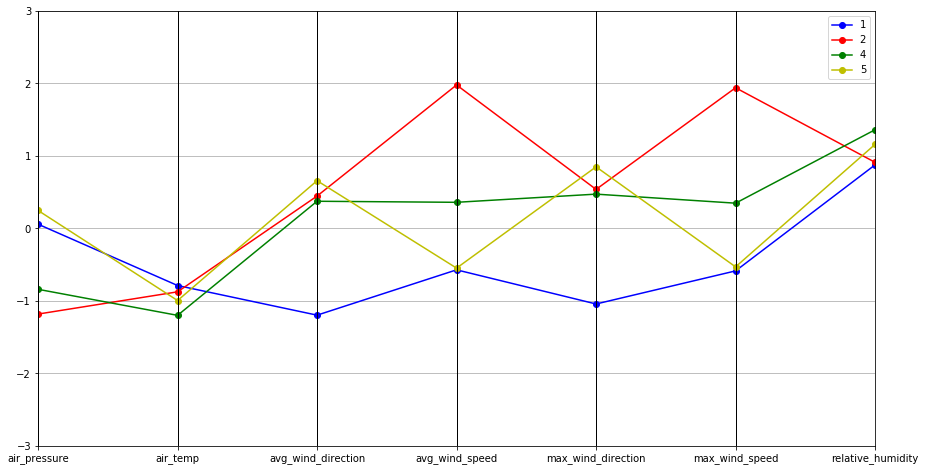

In [40]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])

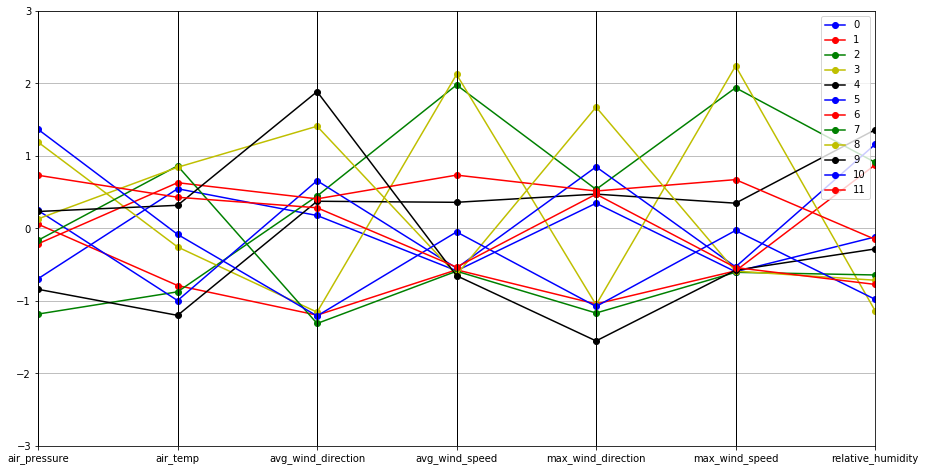

In [41]:
parallel_plot(P)